<a href="https://colab.research.google.com/github/larhchim/Salary-Prediction-Classification-ML/blob/main/Projet_ML_LARHCHIM_EL_BIYAALI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**

Prediction task is to determine whether a person makes over 50K a year.

**Columns are:**

*  age: continuous.
*  workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
*  fnlwgt: continuous.
*  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
*  education-num: continuous.
*  marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
*  occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
*  relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
*  race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
*  sex: Female, Male.
*  capital-gain: continuous.
*  capital-loss: continuous.
*  hours-per-week: continuous.
*  native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
*  salary: <=50K or >50K


**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
from collections import Counter
from scipy.stats import shapiro
import scipy
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import graphviz
from sklearn import tree
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.mixture import BayesianGaussianMixture

# **Loading DataSet of Salary Prediction Classification**

In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas

In [ ]:
# reading the CSV file
csvFile = pandas.read_csv('./salary-prediction-classification/salary.csv',)
 
# displaying the contents of the CSV file
print(csvFile)

       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [ ]:
#Loading a .csv file into a pandas DataFrame
df = pd.read_csv("./salary-prediction-classification/salary.csv")

In [ ]:
#view DataFrame
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#Return the first 2 rows
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [ ]:
#Return the column labels of our DataFrame.
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [ ]:
#The transpose() function is used to transpose index and columns.
#Reflect the first 2 rows of ou DataFrame over its main diagonal by writing rows as columns and vice-versa
df.head(2).transpose()

,0,1
age,39,50
workclass,State-gov,Self-emp-not-inc
fnlwgt,77516,83311
education,Bachelors,Bachelors
education-num,13,13
marital-status,Never-married,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial
relationship,Not-in-family,Husband
race,White,White
sex,Male,Male


## **Cleaning the Data**

In this part we are going to clean our Data.Data cleaning is the process of fixing or removing incorrect, corrupted incorrectly formatted, duplicate, or incomplete data within a dataset. 
Having clean data will ultimately increase overall productivity and permit the very best quality information in your decision-making

### *Find missing values*

In [ ]:
#Mask all values that are NaN as True
df.isnull().mean()

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary            0.0
dtype: float64

In [ ]:
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#shows the unique values in a salary column
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
#some statistical information about data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


### *Remove duplicate rows*




In [ ]:
#Count number of distinct elements
#And return Series with number of distinct elements
counts = df.nunique()
counts

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

In [ ]:
#check Duplicates
df.duplicated().sum()

24

In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Check again if there is no missing values in our dataframe
#Show the number of missing values in the dataFrame by column.
pd.DataFrame({'h': df.nunique().index , 'null':  df.isnull().sum()})

,h,null
age,age,0
workclass,workclass,0
fnlwgt,fnlwgt,0
education,education,0
education-num,education-num,0
marital-status,marital-status,0
occupation,occupation,0
relationship,relationship,0
race,race,0
sex,sex,0


In [ ]:
#Removing spaces from objects data types
df['workclass'] = df['workclass'].str.strip()
df['education'] = df['education'].str.strip()
df['marital-status'] = df['marital-status'].str.strip()
df['occupation'] = df['occupation'].str.strip()
df['relationship'] = df['relationship'].str.strip()
df['race'] = df['race'].str.strip()
df['sex'] = df['sex'].str.strip()
df['native-country'] = df['native-country'].str.strip()
df['salary'] = df['salary'].str.strip()

### *Formatting column of Dataframe*

While presenting the data, showing the data in the required format is also an important and crucial part.
For our case, we'll convert columns with binary answers from strings to integers of 1/0.


*   marital-status
*   salary
*   sex

And change some unwanted data to Nan.



In [ ]:
#Generate descriptive statistics of workplace column
#like percentile, mean and std of the numerical values of the Series or DataFrame.
#It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.
df["workclass"].describe()

count       32537
unique          9
top       Private
freq        22673
Name: workclass, dtype: object

In [ ]:
#Replace all values "?" in workclass by Nan value
df['workclass'] = df['workclass'].replace("?", np.nan)
df["workclass"].isnull().sum()

1836

In [ ]:
#Replace all values "?" in native-country by Nan value
df['native-country'] = df['native-country'].replace("?", np.nan)
df["native-country"].isnull().values.any()

True

In [ ]:
#Replace all values "?" in occupation by Nan value
df['occupation'] = df['occupation'].replace('?', np.nan)
df["occupation"].isnull().sum()

1843

In [ ]:
#Mask all values that are NaN as True
df.isnull().mean()

age               0.000000
workclass         0.056428
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.056643
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017887
salary            0.000000
dtype: float64

In [ ]:
# Fill NaN values by MODE
df['workclass'].fillna(df['workclass'].mode()[0] , axis=0 ,inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0] , axis=0 ,inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0] , axis=0 ,inplace=True)

In [ ]:
#Check if df contains null values 
df.isnull().mean()

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary            0.0
dtype: float64

In [ ]:
#formatting [sex] column 
df['sex']= df['sex'].map({'Female': 0, 'Male': 1})
df['sex'].value_counts()

1    21775
0    10762
Name: sex, dtype: int64

In [ ]:
#formatting the target column
df['salary']= df['salary'].map({'<=50K': 0, '>50K': 1})
df['salary'].value_counts()

0    24698
1     7839
Name: salary, dtype: int64

In [ ]:
#Return a Series containing counts of unique values in education_num column
df['education-num'].value_counts()

9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education-num, dtype: int64

In [ ]:
# Formating [ marital-status ] column
df['marital-status'] =  df['marital-status'].replace(['Married-civ-spouse' , 'Married-spouse-absent' , 'Married-AF-spouse' ] , 1)
df['marital-status'] =  df['marital-status'].replace(['Divorced' , 'Separated' , 'Widowed' ] , 0)
df['marital-status'] =  df['marital-status'].replace(['Never-married'] , -1)

In [ ]:
#Check the formating
#Return a Series containing counts of unique values in maritial-status column
df['marital-status'].value_counts()

 1    15411
-1    10667
 0     6459
Name: marital-status, dtype: int64

In [ ]:
#Returns the first 5 rows of the dataframe
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,-1,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


# *Visualizing Numeric Features*

One of the first steps of the exploratory data process when the ultimate purpose is to predict the output, is to create visualizations that help get knowledge of the output and then to uncover relationships between the attributes and the output. Knowledge about the output can be gained by creating a histogram or box plot.

Important characteristics between attributes can be identified by examining

*  Scatter plots of individual Attributes and the output labels,
*  A pairwise correlation plot among the Attributes,
*  A projection of high-dimensional Attributes into a lower dimensional space,
*  Line plots for time-based Attributes,
*  The first few levels of a regression or classification tree,
*  A heatmap across the samples and Attributes, or
*  Mosaic plots for examining associations among categorical variables.






### *Creating a Seaborn Distplot*

Python Seaborn module contains various functions to plot the data and depict the data variations. The seaborn.distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.


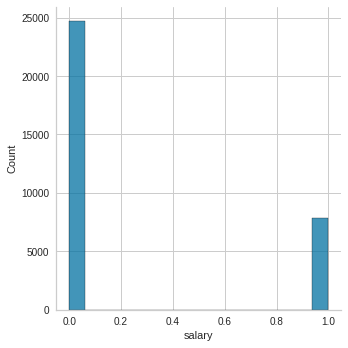

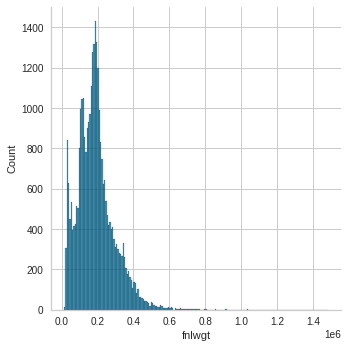

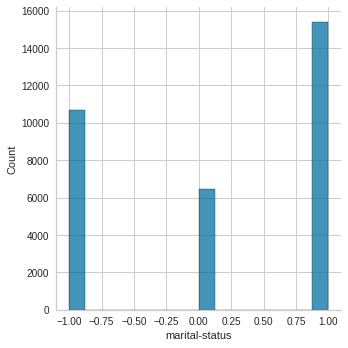

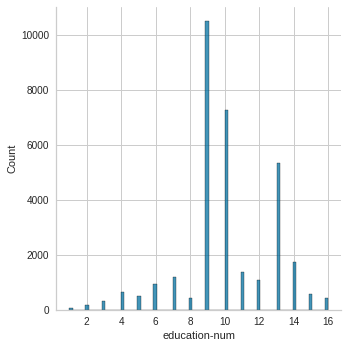

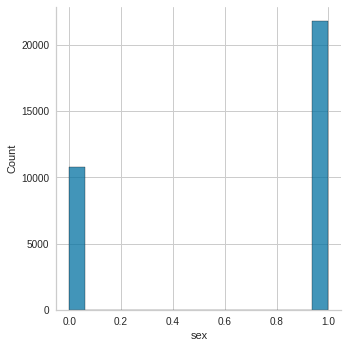

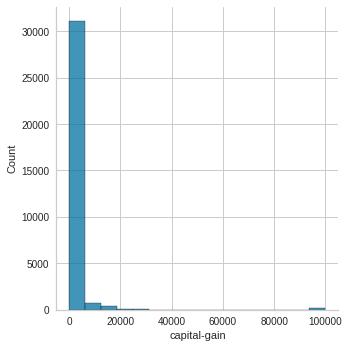

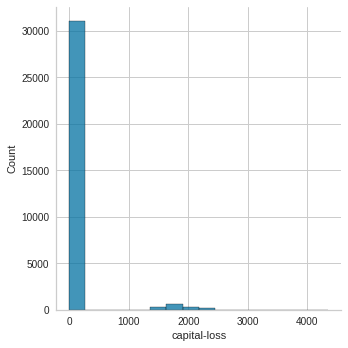

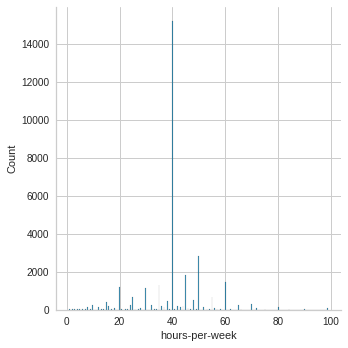

In [ ]:
#The seaborn.distplot() function accepts the data variable as an argument and returns the plot with the density distribution
sns.displot(x="salary",data=df)
sns.displot(x="fnlwgt",data=df)
sns.displot(x="marital-status",data=df)
sns.displot(x="education-num",data=df)
sns.displot(x="sex",data=df)
sns.displot(x="capital-gain",data=df)
sns.displot(x="capital-loss",data=df)
sns.displot(x="hours-per-week",data=df)

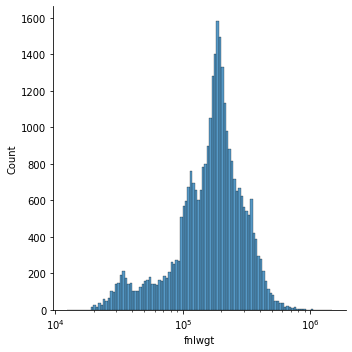

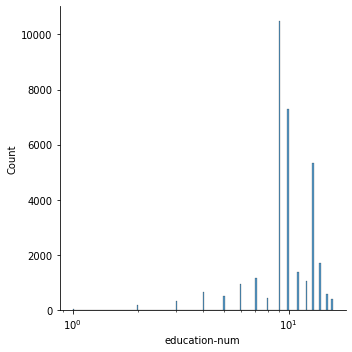

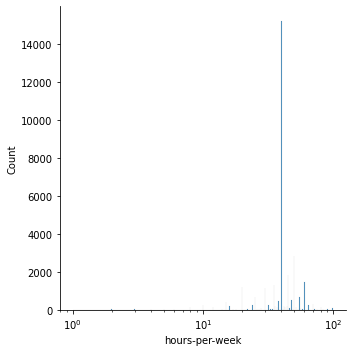

In [ ]:
#the bin edges for the histogram are calculated to be distributed evenly when drawn on a log scale x-axis. 
#Also, the x-axis is automatically drawn as log scale.
sns.displot(x="fnlwgt",data=df,log_scale=True)
sns.displot(x="education-num",data=df,log_scale=True)
sns.displot(x="hours-per-week",data=df,log_scale=True)

# *Dispersion, Correlation*

In [ ]:
#Remove missing values in numerical
numerical = df[["salary","age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]].copy()
numerical = numerical.dropna()

In [ ]:
#Return the mean absolute deviation of the values over all the requested axis in numerical.
numerical.mad()

salary                0.365761
age                  11.187904
fnlwgt            77607.506313
education-num         1.903119
capital-gain       1978.703388
capital-loss        166.578828
hours-per-week        7.584314
dtype: float64

In [ ]:
#Return the mean of the values over the requested axis.
numerical.mean()

salary                 0.240926
age                   38.585549
fnlwgt            189780.848511
education-num         10.081815
capital-gain        1078.443741
capital-loss          87.368227
hours-per-week        40.440329
dtype: float64

In [ ]:
#Return unbiased variance over requested axis.
numerical.var()

salary            1.828861e-01
age               1.859946e+02
fnlwgt            1.114217e+10
education-num     6.613296e+00
capital-gain      5.458191e+07
capital-loss      1.624911e+05
hours-per-week    1.524457e+02
dtype: float64

In [ ]:
#Compute the pairwise covariance among the series of a DataFrame.
#The returned data frame is the covariance matrix of the columns of the DataFrame.
numerical.cov()

,salary,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
salary,0.182886,1.364977,-4.289496e+02,0.368719,7.056258e+02,25.944414,1.212634
age,1.364977,185.994594,-1.100517e+05,1.270447,7.826382e+03,317.454068,11.536939
fnlwgt,-428.949578,-110051.688494,1.114217e+10,-11777.880524,3.342341e+05,-436568.823027,-24629.699183
education-num,0.368719,1.270447,-1.177788e+04,6.613296,2.330502e+03,82.818379,4.712652
capital-gain,705.625846,7826.382249,3.342341e+05,2330.502298,5.458191e+07,-94224.613427,7152.207079
capital-loss,25.944414,317.454068,-4.365688e+05,82.818379,-9.422461e+04,162491.087819,269.901814
hours-per-week,1.212634,11.536939,-2.462970e+04,4.712652,7.152207e+03,269.901814,152.445672


In [ ]:
#Compute pairwise correlation of columns
numerical.corr()

,salary,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
salary,1.000000,0.234037,-0.009502,0.335272,0.223336,0.150501,0.229658
age,0.234037,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.009502,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education-num,0.335272,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital-gain,0.223336,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital-loss,0.150501,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours-per-week,0.229658,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


# *Checking correlation/covariance relation*

We check that the person correlation is indeed the covariance divided by the square root of the product of variance

In [ ]:
covariance = numerical.cov()
covariance["salary"].loc["education-num"]/np.sqrt(numerical.var()["salary"]*numerical.var()["education-num"])

0.3352715122489292

A pairplot plot a pairwise relationships in a dataset.
The pairplot function creates a grid of Axes such that each variable in numerical will by shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown below.

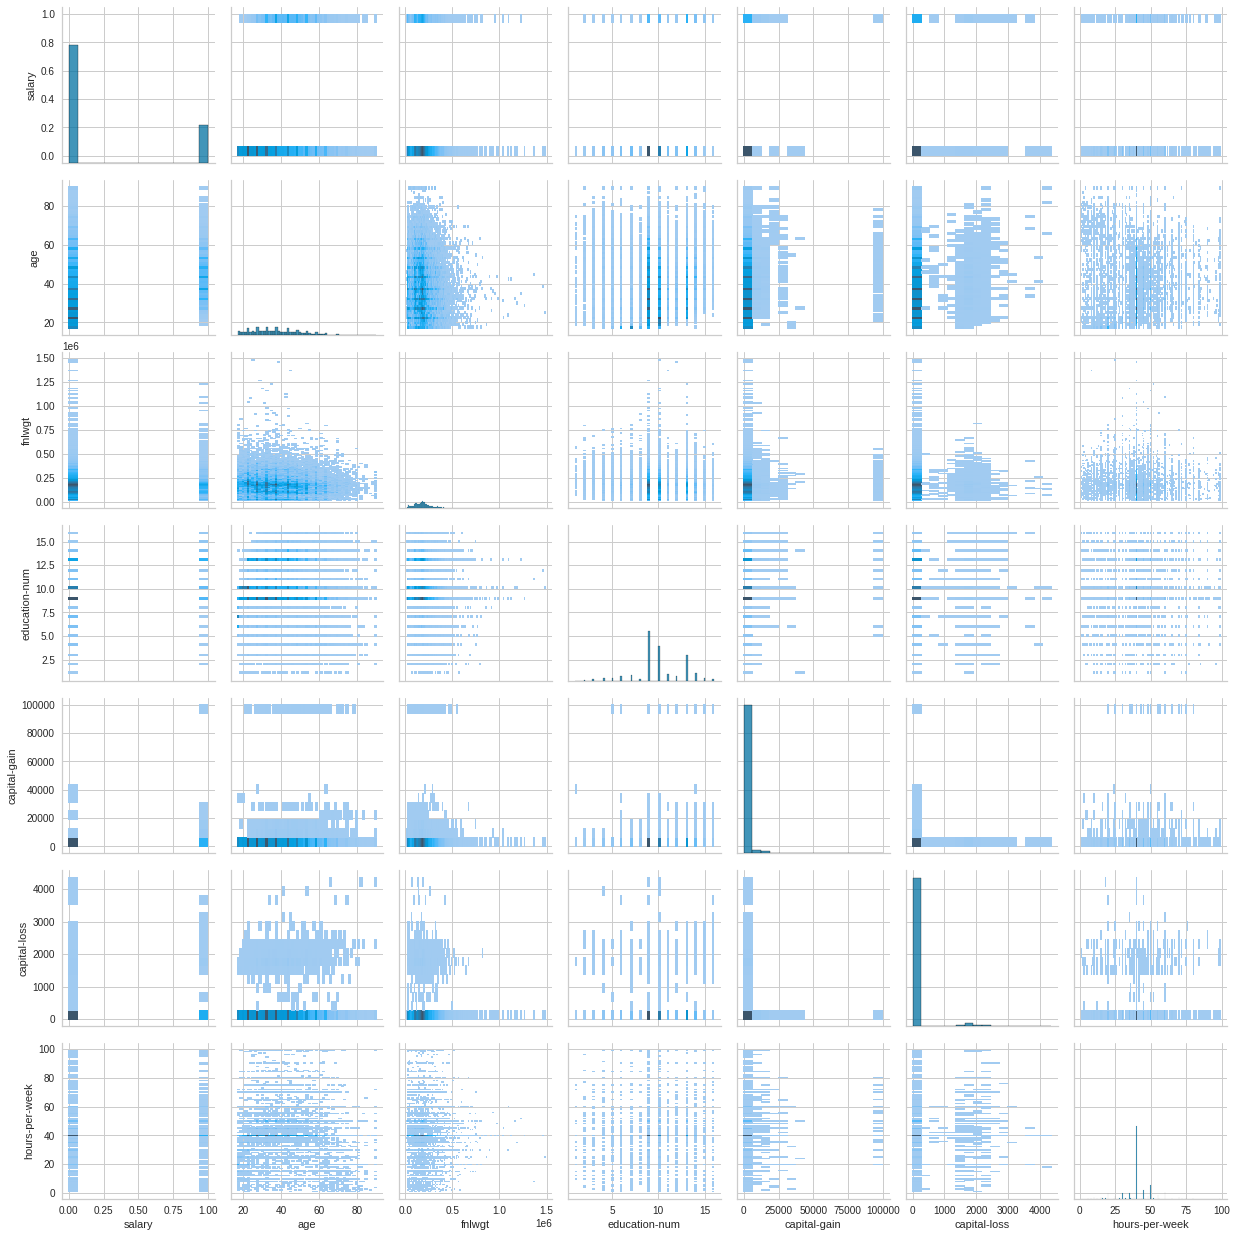

In [ ]:
sns.pairplot(numerical, kind="hist")

As we have the discrete and ordinals variables, we will use Spearman.
Indeed,the Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation.
Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of association between two ranked variables.

In [ ]:
numerical.corr(method="spearman")

,salary,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
salary,1.000000,0.272896,-0.010798,0.329787,0.278152,0.141015,0.269071
age,0.272896,1.000000,-0.077917,0.066199,0.124905,0.058433,0.142763
fnlwgt,-0.010798,-0.077917,1.000000,-0.035828,-0.006032,-0.006910,-0.021882
education-num,0.329787,0.066199,-0.035828,1.000000,0.119126,0.074730,0.167465
capital-gain,0.278152,0.124905,-0.006032,0.119126,1.000000,-0.066622,0.093316
capital-loss,0.141015,0.058433,-0.006910,0.074730,-0.066622,1.000000,0.059842
hours-per-week,0.269071,0.142763,-0.021882,0.167465,0.093316,0.059842,1.000000


By using a histogram , we get a quick understanding of the distribution of certain numerical variables within our dataset.A histogram divides the values within a numerical variable into “bins”, and counts the number of observations that fall into each bin. By visualizing these binned counts in a columnar fashion, we can obtain a very immediate and intuitive sense of the distribution of values within a variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a5ff13d60>,
      dtype=object)

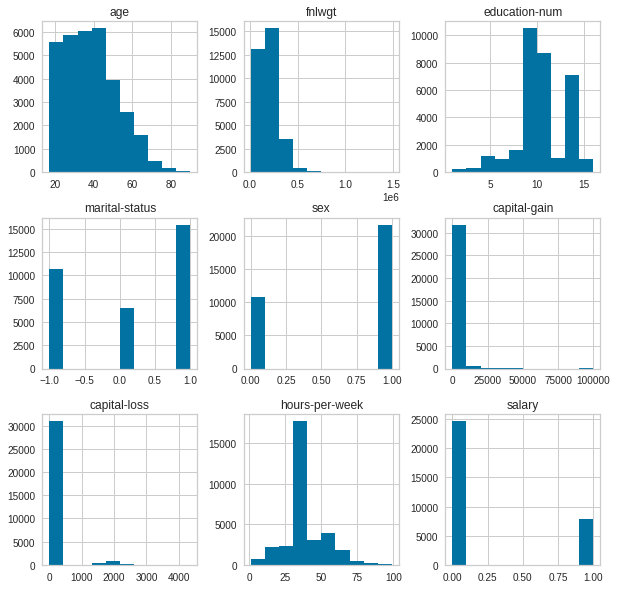

In [ ]:
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']
numerical_columns = df.select_dtypes(include=numeric_types).columns.tolist()
pd.DataFrame(df[numerical_columns]).hist(figsize=(10,10))

In [ ]:
df[numerical_columns].describe()

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,salary
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,0.145803,0.669238,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,0.883319,0.470495,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,-1.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,1.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,1.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

    z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.DataFrame(
    StandardScaler().fit_transform(df[numerical_columns]),
    columns=numerical_columns
).describe()

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,salary
count,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04
mean,-7.555945e-17,-1.255685e-16,2.849858e-17,4.018190e-17,7.130104e-17,3.646945e-17,4.367598e-19,-6.485884e-17,-4.367598e-19
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582777e+00,-1.681551e+00,-3.531590e+00,-1.297176e+00,-1.422436e+00,-1.459754e-01,-2.167432e-01,-3.194403e+00,-5.633774e-01
25%,-7.761933e-01,-6.816726e-01,-4.206787e-01,-1.297176e+00,-1.422436e+00,-1.459754e-01,-2.167432e-01,-3.566374e-02,-5.633774e-01
50%,-1.162616e-01,-1.082361e-01,-3.181473e-02,-1.650654e-01,7.030196e-01,-1.459754e-01,-2.167432e-01,-3.566374e-02,-5.633774e-01
75%,6.903217e-01,4.472760e-01,7.459132e-01,9.670455e-01,7.030196e-01,-1.459754e-01,-2.167432e-01,3.693028e-01,-5.633774e-01
max,3.770003e+00,1.226778e+01,2.301369e+00,9.670455e-01,7.030196e-01,1.338964e+01,1.058963e+01,4.742941e+00,1.775009e+00


Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [ ]:
pd.DataFrame(
    MinMaxScaler().fit_transform(df[numerical_columns]),
    columns=numerical_columns
).describe()

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,salary
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,0.295692,0.120547,0.605454,0.572902,0.669238,0.010785,0.020057,0.402452,0.240926
std,0.186822,0.071689,0.171442,0.441660,0.470495,0.073880,0.092539,0.125989,0.427652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071679,0.533333,0.000000,0.000000,0.000000,0.000000,0.397959,0.000000
50%,0.273973,0.112788,0.600000,0.500000,1.000000,0.000000,0.000000,0.397959,0.000000
75%,0.424658,0.152611,0.733333,1.000000,1.000000,0.000000,0.000000,0.448980,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Salaries ratio for all persons the distribution of salaries is as following: 24000 persons wich is 76% of persons has less than or equal 50k annual salary and 24% of persons has more than 50k as annual salary

Text(0.5, 1.0, 'Salaries ratio for all persons')

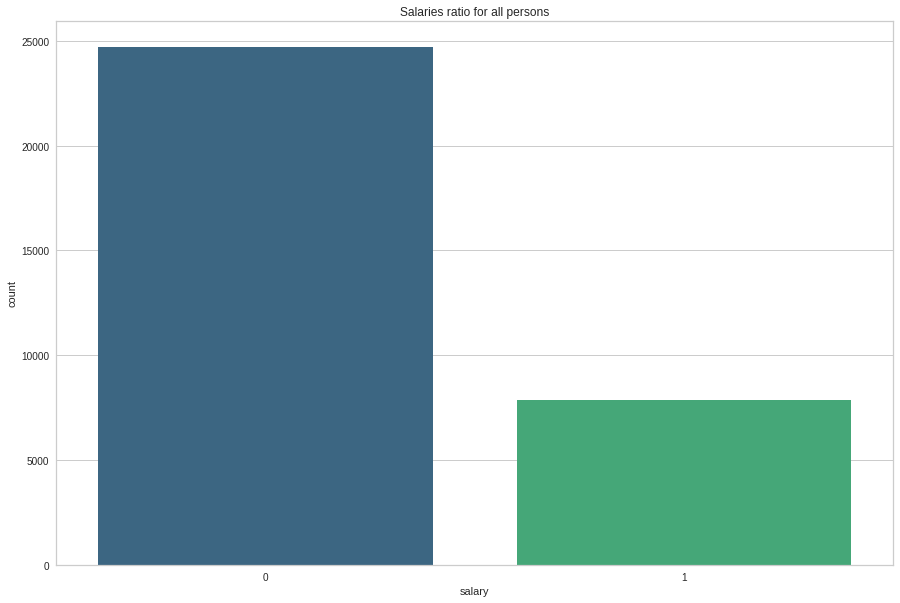

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot( x=df.salary , data= df , palette='viridis')
ax.set_title('Salaries ratio for all persons')


The distribution of salaries for male and female we notice that females with blue colors have the most dominant salary in both categories of persons <=50k and also >50k annual salary


Text(0.5, 1.0, 'Salaries ratio for Male/Female')

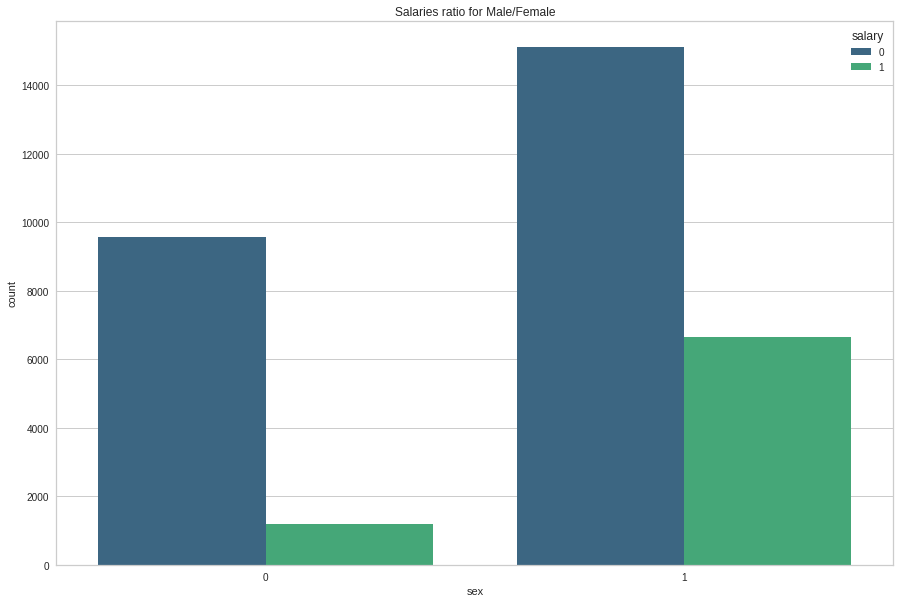

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='sex', hue='salary', palette='viridis').set_title('Salaries ratio for Male/Female')

In [ ]:
df[df['sex']==1].salary.value_counts(normalize=True).mul(100).round(0).astype(str) + ' %'

0    69.0 %
1    31.0 %
Name: salary, dtype: object

This function provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots. The kind parameter selects the approach to use
persons with <=50k annual salary have more density compared to persons with annual incomes >50k

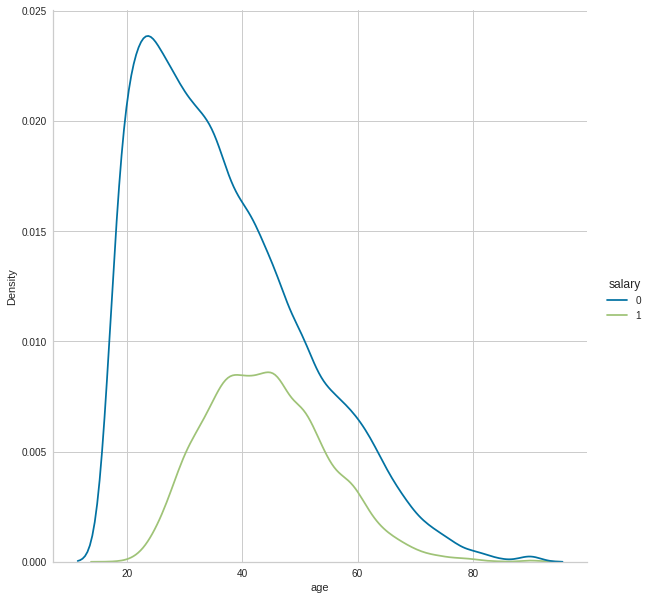

In [ ]:
sns.displot(data=df, x="age", hue="salary", kind="kde", height=8.5, aspect=1)

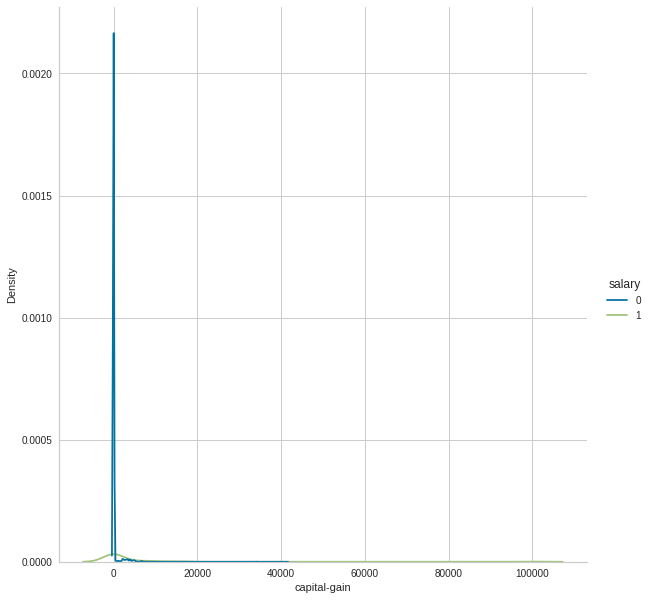

In [ ]:
sns.displot(data=df, x="capital-gain", hue="salary", kind="kde", height=8.5, aspect=1)

Remove the column capital gain by specifying label names and corresponding axis, or by specifying directly index or column names because we do not retreive much informations from it the most common density is under capital gain valued to zero

In [ ]:
df.drop('capital-gain', inplace=True, axis=1)

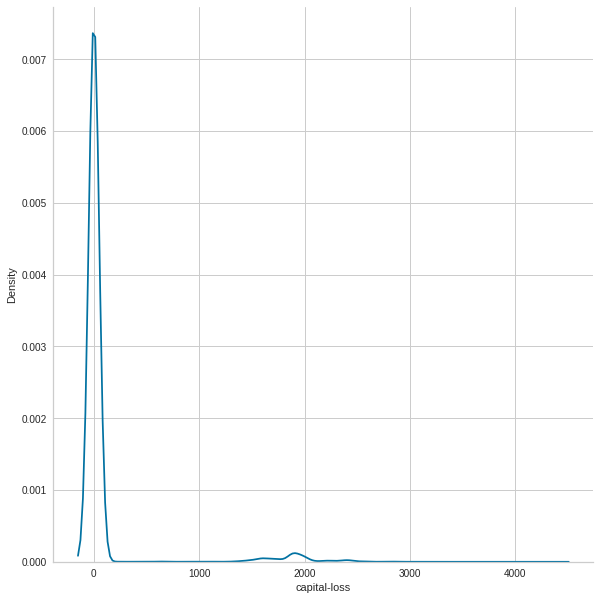

In [ ]:
sns.displot(data=df, x="capital-loss", kind="kde", height=8.5, aspect=1)

Remove the column capital loss by specifying label names and corresponding axis, or by specifying directly index or column names because we do not retreive much informations from it the most common density is under capital loss valued to zero

In [ ]:
df.drop('capital-loss', inplace=True, axis=1)

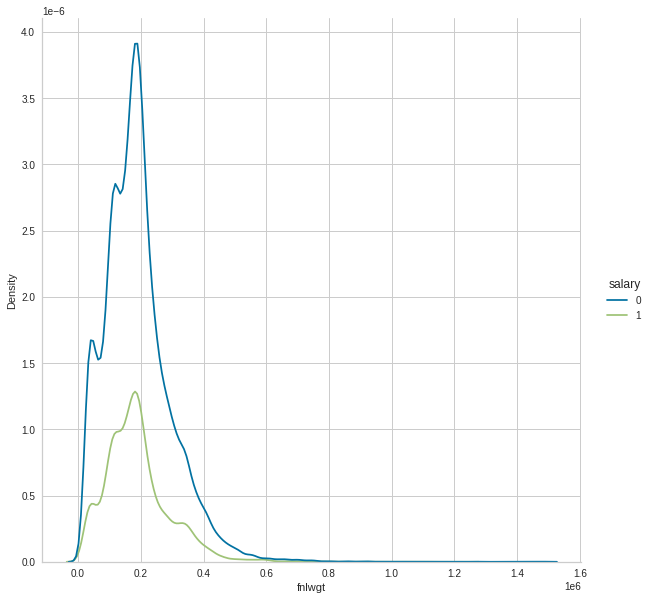

In [ ]:
sns.displot(data=df, x="fnlwgt", hue="salary", kind="kde", height=8.5, aspect=1)

We can notice that the most common population density for education number is arround 9 for persons with salary <=50k and arround 14 for persons with salary >50k so we can sum up that education number can be a good parameter to define in which range of salary the person can be put on

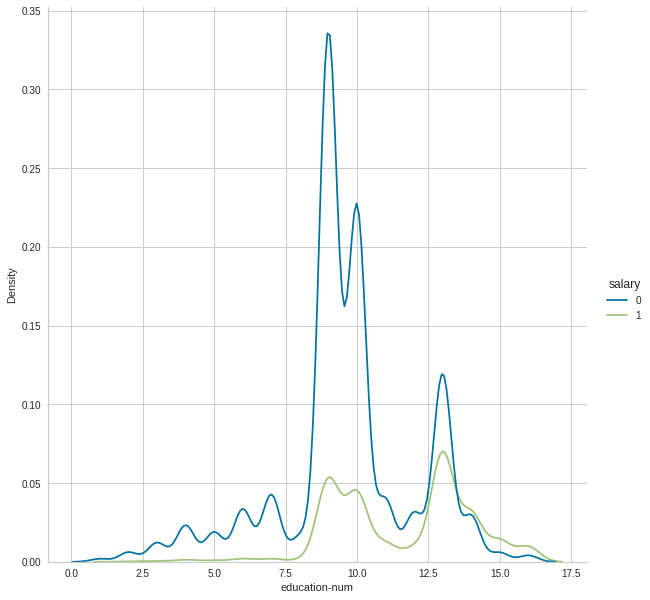

In [ ]:
sns.displot(data=df, x="education-num", hue="salary", kind="kde", height=8.5, aspect=1)

Formatting education number column assign persons with education number of range 1 to 9 with value 0 then persons with education number 9 to value 1 and persons with education numbers 13,14,15 with 4,5,6 respectively so we can have more easy distribution for next treatment

In [ ]:
# Formating [ education-num ] column
df['education-num'] =  df['education-num'].replace(range(1,9) , 0) #Compulsory (Preschool:Grade12)
df['education-num'] =  df['education-num'].replace(9 , 1) #Highschool-Graduate
df['education-num'] =  df['education-num'].replace([10,13],2) #Bachelor or SomeCollege
df['education-num'] =  df['education-num'].replace([11,12],3) #Assoc-voc or Assoc-acdm
df['education-num'] =  df['education-num'].replace(13,4) #Masters
df['education-num'] =  df['education-num'].replace(14,5) #Prof-school
df['education-num'] =  df['education-num'].replace(15,6) #Doctrate

showing Education number values as class of numbers assigned to which class is dominating we can see that class 2 is the most often one that reflect persons with Bachelor or SomeCollege

In [ ]:
df['education-num'].value_counts()

2     12635
1     10494
0      4248
3      2449
5      1722
6       576
16      413
Name: education-num, dtype: int64

LabelEncoder() takes a categorical column and converts/maps it to numerical values.

for example we have here a dataset of salaries of persons with object dataType  and we want to do some machine learning (that uses mathematics) on that dataframe, mathematically, we can't do any computations to the string or Object values. But what we can do is map a value for each of those object values that allow machine learning algorithms to do their thing:

So we use it on our training data, and it will figure out the unique values and assign a value to it:

In [ ]:
le = LabelEncoder()

In [ ]:
for i in df.columns:
    if (df[i].dtypes== 'object') :
        df[i] = le.fit_transform(df[i])

In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.


In [ ]:
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
clf = RandomForestClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=44 )

First predictions: **linear** 

In [ ]:
numerical

,salary,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,39,77516,13,2174,0,40
1,0,50,83311,13,0,0,13
2,0,38,215646,9,0,0,40
3,0,53,234721,7,0,0,40
4,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...
32556,0,27,257302,12,0,0,38
32557,1,40,154374,9,0,0,40
32558,0,58,151910,9,0,0,40
32559,0,22,201490,9,0,0,20


LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
def print_errors(y_true,prediction):
    print("MSE",mean_squared_error(y_true,prediction,squared=True))
    print("RMSE",mean_squared_error(y_true,prediction,squared=False))
    print("MAE",mean_absolute_error(y_true,prediction))
    print("R2",r2_score(y_true,prediction))
    

In [ ]:
print_errors(y_train,lr.predict(X_train))

MSE 0.16451199981240164
RMSE 0.4056007887226079
MAE 0.3464767008050926
R2 0.3419453102727278


In [ ]:
print_errors(y_test,lr.predict(X_test))

MSE 0.16466990861290243
RMSE 0.4057954024048356
MAE 0.3482052011692789
R2 0.34121322050717484


In [ ]:
print([(X_resampled.columns[i],lr.coef_[i]) for i in range(len(X_resampled.columns))])
print(lr.intercept_)

[('age', 0.002127502597446484), ('workclass', -0.04082300697053429), ('fnlwgt', 6.082128193446446e-08), ('education', 0.0007793550526352001), ('education-num', 0.041451680244917376), ('marital-status', 0.2366936969828732), ('occupation', -0.0007710067215879995), ('relationship', -0.04987487591799989), ('race', 0.006270684252878824), ('sex', -0.07043519613754454), ('hours-per-week', 0.005512378418468457), ('native-country', 0.0026773156041382594)]
0.10399898272931873


# Decision Tree

Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

The branches/edges represent the result of the node and the nodes have either: 

    Conditions [Decision Nodes]
    Result [End Nodes]

Decision Tree Regression:
 
Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
print_errors(y_train,dt.predict(X_train))
print("---")
print_errors(y_test,dt.predict(X_test))

MSE 1.265310254074299e-05
RMSE 0.003557119978401486
MAE 2.530620508148598e-05
R2 0.9999493870752527
---
MSE 0.16497975708502025
RMSE 0.4061770021616441
MAE 0.16497975708502025
R2 0.3399736250109685


In [ ]:
dt = DecisionTreeRegressor(max_leaf_nodes=20,min_samples_leaf=30)
dt.fit(X_train,y_train)
print_errors(y_train,dt.predict(X_train))
print("---")
print_errors(y_test,dt.predict(X_test))

MSE 0.12786962304303742
RMSE 0.3575886226420486
MAE 0.25573924608607485
R2 0.48851630754545117
---
MSE 0.12895985252498826
RMSE 0.3591098056653261
MAE 0.258148233147989
R2 0.48407668016310523


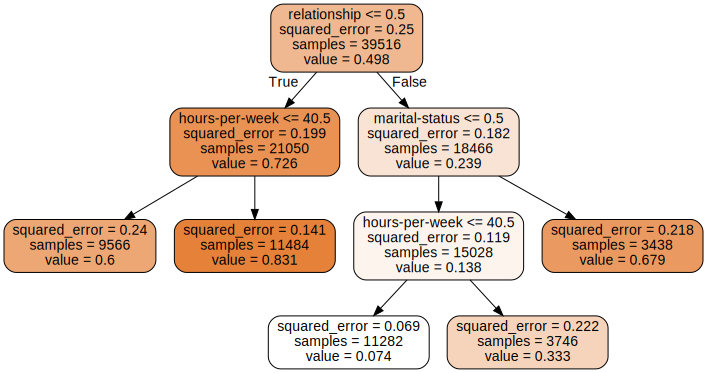

In [ ]:
dt = DecisionTreeRegressor(max_leaf_nodes=5,min_samples_leaf=30)
dt.fit(X_train,y_train)
dot_data = tree.export_graphviz(dt,feature_names=X_resampled.columns,rounded=True,filled=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
km= KMeans(n_clusters=3)
#Note: fit learns the "boundaries" of clusters, i.e., when presented with a data point, 
#given its features, tells the  cluster it belongs to.
km.fit(numerical)
#Predict give the clusters for a given set of points. Here we use the same data for fit
#and predict so we could use fit_predict function. But we could also predict "new", unseen points
clusters = km.predict(numerical)

In [ ]:
dataAndCluster = numerical.copy()
dataAndCluster["cluster"]=clusters

In [ ]:
dataAndCluster.groupby("cluster").agg(['mean',"count"])

salary               age                fnlwgt         \
             mean  count       mean  count           mean  count   
cluster                                                            
0        0.240332  15903  38.354839  15903  205270.211658  15903   
1        0.234801   4770  36.632704   4770  377807.013836   4770   
2        0.244184  11864  39.679956  11864   93421.092043  11864   

        education-num        capital-gain        capital-loss         \
                 mean  count         mean  count         mean  count   
cluster                                                                
0           10.060052  15903  1045.262655  15903    85.811922  15903   
1            9.915304   4770  1126.173585   4770    81.576939   4770   
2           10.177933  11864  1103.730951  11864    91.782788  11864   

        hours-per-week         
                  mean  count  
cluster                        
0            40.315789  15903  
1            40.277987   4770  
2            40.672539  11864

In [ ]:
num_std = StandardScaler().fit_transform(numerical)

km= KMeans(n_clusters=3)
clusters = km.fit_predict(num_std)

dataAndCluster2 = numerical.copy()
dataAndCluster2["cluster"]=clusters
dataAndCluster2.groupby("cluster").agg(['mean',"count"])

salary               age                fnlwgt         \
             mean  count       mean  count           mean  count   
cluster                                                            
0        0.000167  23915  36.670374  23915  190672.313443  23915   
1        0.519892   1483  41.639245   1483  185652.934592   1483   
2        0.989494   7139  44.366858   7139  187652.022692   7139   

        education-num        capital-gain        capital-loss         \
                 mean  count         mean  count         mean  count   
cluster                                                                
0            9.573699  23915   148.905959  23915     0.846080  23915   
1           10.988537   1483     0.000000   1483  1902.333109   1483   
2           11.595602   7139  4416.338143   7139     0.182939   7139   

        hours-per-week         
                  mean  count  
cluster                        
0            38.678486  23915  
1            43.359407   1483  
2            45.735957   7139

In [ ]:
silhouette_score(num_std,dataAndCluster2["cluster"])

0.33056847768010506

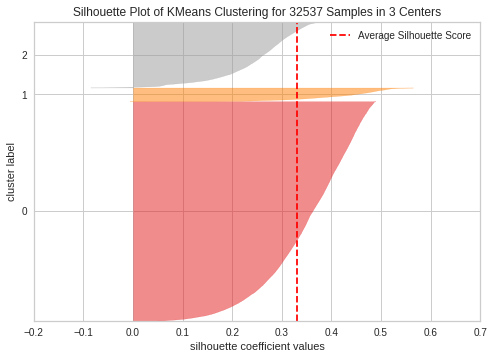

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a5e89f340>,
                     estimator=KMeans(n_clusters=3))

In [ ]:
silhouette_visualizer(km, num_std)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



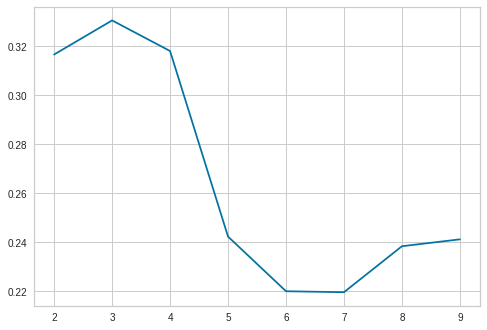

In [ ]:
x=[]
y=[]
y_inertia =[]
for k in range(2,10):
  x.append(k)
  km= KMeans(n_clusters=k)
  km.fit(num_std)
  clusters = km.predict(num_std)
  y.append(silhouette_score(num_std,clusters))
  y_inertia.append(km.inertia_)
sns.lineplot(x,y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



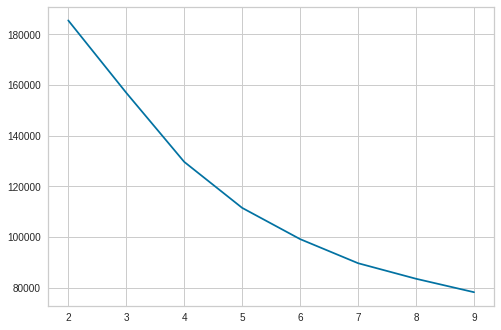

In [ ]:
sns.lineplot(x,y_inertia)

*Bayesian Gaussian Mixtures*



In [ ]:
bg = BayesianGaussianMixture(n_components=5)
clusters = bg.fit_predict(num_std)

dataAndCluster2 = numerical.copy()
dataAndCluster2["cluster"]=[str(x) for x in clusters]
dataAndCluster2.groupby("cluster").agg(['mean',"count"])

salary               age                fnlwgt         \
             mean  count       mean  count           mean  count   
cluster                                                            
0        0.000000   1021  41.862880   1021  187071.829579   1021   
1        1.000000   6907  44.173302   6907  187913.001593   6907   
2        0.508887   1519  41.697828   1519  185492.941409   1519   
3        0.952096    167  45.814371    167  194192.574850    167   
4        0.000000  22923  36.497012  22923  190716.315055  22923   

        education-num         capital-gain        capital-loss         \
                 mean  count          mean  count         mean  count   
cluster                                                                 
0            9.739471   1021   3331.382958   1021     0.000000   1021   
1           11.538005   6907   2245.884175   6907     0.000000   6907   
2           10.969059   1519      0.000000   1519  1871.428571   1519   
3           12.700599    167  96856.143713    167     0.000000    167   
4            9.580421  22923      0.029839  22923     0.000000  22923   

        hours-per-week         
                  mean  count  
cluster                        
0            39.842311   1021  
1            45.274504   6907  
2            43.252798   1519  
3            48.844311    167  
4            38.762771  22923

In [ ]:
model = clf.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy on Test Data : {:,.2f}".format(clf.score(X_test , y_test) *100 ) , '%')

Accuracy on Test Data : 87.27 %


In [ ]:
print(accuracy_score(y_pred, y_test))

0.872672064777328


In [ ]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4877
           1       0.87      0.88      0.87      5003

    accuracy                           0.87      9880
   macro avg       0.87      0.87      0.87      9880
weighted avg       0.87      0.87      0.87      9880



APRIORI ALGO WITH HELP OF https://hands-on.cloud/implementation-of-apriori-algorithm-using-python/

In [ ]:
# dataset
data = df

# printing the shape of the dataset
data.shape

(32537, 13)

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,6,77516,9,2,-1,0,1,4,1,40,38,0
1,50,5,83311,9,2,1,3,0,4,1,13,38,0
2,38,3,215646,11,1,0,5,1,4,1,40,38,0
3,53,3,234721,1,0,1,5,0,2,1,40,38,0
4,28,3,338409,9,2,1,9,5,2,0,40,4,0


In [ ]:
# importing module
import numpy as np

# Gather All Items of Each Transactions into Numpy Array
transaction = []
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        transaction.append(data.values[i,j])

# converting to numpy array
transaction = np.array(transaction)

#  Transform Them a Pandas DataFrame
df = pd.DataFrame(transaction, columns=["items"]) 

# Put 1 to Each Item For Making Countable Table, to be able to perform Group By
df["incident_count"] = 1 

#  Delete NaN Items from Dataset
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

# Making a New Appropriate Pandas DataFrame for Visualizations  
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

#  Initial Visualizations
df_table.head(10).style.background_gradient(cmap='Greens')

,items,incident_count
0,1,68267
1,0,65345
2,3,36622
3,4,33829
4,38,31037
5,2,21379
6,40,16014
7,11,14184
8,9,11379
9,-1,10667


In [ ]:
# importing required module
import plotly.express as px

# to have a same origin
df_table["all"] = "all" 

# creating tree map using plotly
fig = px.treemap(df_table.head(30), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(30), hover_data=['items'],
                  color_continuous_scale='Greens',
                )
# ploting the treemap
fig.show()

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,_,c,d,e,i,m,n,o,s,t,u
0,False,False,False,True,True,True,False,False,True,True,False
1,True,True,True,True,True,False,True,True,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
422976,False,False,False,False,False,False,False,False,False,False,False
422977,False,False,False,False,False,False,False,False,False,False,False
422978,False,False,False,False,False,False,False,False,False,False,False
422979,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# importing the required module
from mlxtend.frequent_patterns import apriori, association_rules


# Extracting the most frequest itemsets via Mlxtend.
# The length column has been added to increase ease of filtering.
frequent_itemsets = apriori(df, min_support=0, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# printing the frequent itemset
frequent_itemsets

,support,itemsets,length
0,0.000002,(_),1
1,0.000002,(c),1
2,0.000002,(d),1
3,0.000005,(e),1
4,0.000005,(i),1
...,...,...,...
2042,0.000000,"(_, n, i, o, t, m, d, u, s, c)",10
2043,0.000000,"(_, n, e, i, o, t, m, u, s, c)",10
2044,0.000000,"(_, n, e, i, o, t, m, d, u, s)",10
2045,0.000000,"(n, e, i, o, t, m, d, u, s, c)",10


In [ ]:
# printing the frequntly items 
frequent_itemsets[ (frequent_itemsets['length'] >= 8) &
                   (frequent_itemsets['support'] >= 0.000002) ]

,support,itemsets,length
1826,0.000002,"(_, n, e, i, o, t, d, c)",8
1827,0.000002,"(_, n, e, i, o, d, u, c)",8
1830,0.000002,"(_, n, e, i, t, d, u, c)",8
1833,0.000002,"(_, e, i, o, t, d, u, c)",8
1847,0.000002,"(_, n, e, o, t, d, u, c)",8
1862,0.000002,"(_, n, i, o, t, d, u, c)",8
1883,0.000002,"(_, n, e, i, o, t, u, c)",8
1911,0.000002,"(_, n, e, i, o, t, d, u)",8
1947,0.000002,"(n, e, i, o, t, d, u, c)",8
1992,0.000002,"(_, n, e, i, o, t, d, u, c)",9


In [ ]:
#  We set our metric as "Lift" to define whether antecedents & consequents are dependent our not
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

/usr/local/lib/python3.8/dist-packages/mlxtend/frequent_patterns/association_rules.py:105: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.8/dist-packages/mlxtend/frequent_patterns/association_rules.py:106: RuntimeWarning:

invalid value encountered in double_scalars



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
0,(_),(c),0.000002,0.000002,0.000002,1.0,422981.0,0.000002,inf,1,1
12430,"(d, n, e, c)","(_, o, u)",0.000002,0.000002,0.000002,1.0,422981.0,0.000002,inf,4,3
12436,"(d, e, o, u)","(_, n, c)",0.000002,0.000002,0.000002,1.0,422981.0,0.000002,inf,4,3
12435,"(d, n, c, u)","(_, e, o)",0.000002,0.000002,0.000002,1.0,422981.0,0.000002,inf,4,3
12434,"(n, c, o, u)","(_, d, e)",0.000002,0.000002,0.000002,1.0,422981.0,0.000002,inf,4,3
...,...,...,...,...,...,...,...,...,...,...,...
10915,"(c, o, u)","(t, e, i)",0.000002,0.000005,0.000002,1.0,211490.5,0.000002,inf,3,3
2721,"(_, d, c, u)",(i),0.000002,0.000005,0.000002,1.0,211490.5,0.000002,inf,4,1
15985,"(t, e, i)","(d, n, o, u)",0.000005,0.000002,0.000002,0.5,211490.5,0.000002,1.999995,3,4
2715,(t),"(_, d, i, c)",0.000005,0.000002,0.000002,0.5,211490.5,0.000002,1.999995,1,4


In [ ]:
# Sort values based on confidence
rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
0,(_),(c),0.000002,0.000002,0.000002,1.0,422981.0,0.000002,inf,1,1
12296,"(_, d, o, t)","(n, e, c)",0.000002,0.000002,0.000002,1.0,422981.0,0.000002,inf,4,3
12495,"(d, c)","(_, n, e, o, u)",0.000002,0.000002,0.000002,1.0,422981.0,0.000002,inf,2,5
12494,"(d, u)","(_, n, e, o, c)",0.000002,0.000002,0.000002,1.0,422981.0,0.000002,inf,2,5
12493,"(o, c)","(_, n, e, d, u)",0.000002,0.000002,0.000002,1.0,422981.0,0.000002,inf,2,5
...,...,...,...,...,...,...,...,...,...,...,...
1536,(t),"(d, i, c)",0.000005,0.000002,0.000002,0.5,211490.5,0.000002,1.999995,1,3
1538,(i),"(t, d, c)",0.000005,0.000002,0.000002,0.5,211490.5,0.000002,1.999995,1,3
6007,"(t, i)","(d, n, u)",0.000005,0.000002,0.000002,0.5,211490.5,0.000002,1.999995,2,3
6014,(i),"(t, n, u, d)",0.000005,0.000002,0.000002,0.5,211490.5,0.000002,1.999995,1,4
